In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
pontos = pd.read_csv("pontos.xlsx.csv", sep=';')
premios = pd.read_csv("premios.csv", sep=';')
titulos = pd.read_csv("titulos.csv", sep=';')
participacao_jogadores = pd.read_csv("participacao_jogadores.csv", sep=';')
participacao = pd.read_csv("participacoes.csv", sep=';')

###### O intuito desta análise é apenas conhecer um pouco do cenário brasileiro de League of Legends, se tratando de números de jogadores e equipes. Todos os dados eu extrai da web, e organizei em alguns csvs, sem muito critério, a ideia é analisar e visualizar as informações por aqui.

#### Particiçação 
Vamos conhecer quais as equipes mais tradicionais do cenário de Esports do Brasil, na modalidade do League of Legends.


Visualizando o DataFrame referente as participações.

In [55]:
participacao.head()

,Equipe,Participações,Edições das quais participou
0,CNB e-Sports Club,14,True
1,Vivo Keyd,14,False
2,KaBuM! e-Sports,14,False
3,INTZ e-Sports,14,False
4,paiN Gaming,14,True


####  O CBLOL teve sua primeira edição em 2012, então primeira análise que eu queria era saber quais foram as equipes que disputaram a primeira edição do campeonato.
#### Para isso, utilizo do recurso startswith para filtrar, pelo index, quais são as equipes.

In [4]:
participacao['Edições das quais participou'] = participacao['Edições das quais participou'].str.startswith('2012', na=False)
participacao.loc[participacao['Edições das quais participou'] == True]


,Equipe,Participações,Edições das quais participou
0,CNB e-Sports Club,14,True
4,paiN Gaming,14,True
17,RMA,2,True
26,vTi Ignis,1,True
27,vTi Nox,1,True
28,Influxo,1,True
29,Insight,1,True
30,Verdict,1,True


#### Sendo assim, sabemos que as equipes que disputaram a primeira edição do CBLOL foram: CNB e-Sports Club, paiN Gaming, RMA, vTi Ignis,vTi Nox, Influxo, Insight, Verdict.
#### Em 2021 o CBLOL adota o modelo de franquia, nesta nova modalidade, as equipes são fixas, e não existem mais rebaixamento. O que podemos observar é que, das 09 equipes que participaram da primeira edição, apenas a Pain Gaming se encontra hoje ainda ativa no campeonato.
<img src="CBLOL2021.png" >



### ------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Agora, vamos saber quais equipes, em todo histórico, somaram mais pontos, menos pontos, e chegaram em mais finais.

In [54]:
pontos.head()

,Equipe,Pontos Ganhos,Vitórias,Empates,Derrotas,Finais Participadas
0,vTi Nox,6,2,0,1,1
1,vTi Ignis,9,3,0,0,1
2,Vivo Keyd,149,44,17,20,5
3,TShow,0,0,0,7,0
4,Team United,5,1,2,7,0


In [6]:
sorted_pontos = pontos.sort_values(by=['Pontos Ganhos'],ignore_index=True,na_position='first')
sorted_pontos = sorted_pontos.tail()

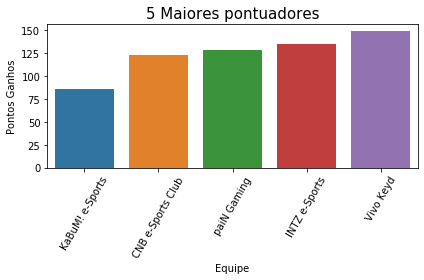

In [7]:
#criando uma figure, axes
fig, ax = plt.subplots()
#Adicionando um título
ax.set_title("5 Maiores pontuadores", fontdict={'fontsize':15})
#Colocando na inclinação os nomes das equipes
plt.xticks(rotation = 60)
#criando o gráfico de barras 
sns.barplot(x=sorted_pontos['Equipe'], y=sorted_pontos['Pontos Ganhos'], ax=ax, data=sorted_pontos)
#otimizar espaço da figure
fig.tight_layout();

#### Acaba que essa análise é um pouco inviesada pelo detalhe que, consequentemente times que estão a mais tempo na competição, terão mais pontos. Porém o fato curioso é que, equipes como INTZ e KaBum, mesmo sendo introduzidas ao CBLOL em 2014, figuram o top 5. 

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
titulos

,Equipe,Títulos,Vices,Edições em que foi campeão,Edições em que foi vice,Ref
0,INTZ e-Sports,5,2,"2015 (1ª), 2016 (1ª e 2ª), 2019 (1ª), 2020 (2ª)","2015 (2ª), 2019 (2ª)",[101]-
1,KaBuM!,4,0,"2014 (2ª), 2018 (1ª e 2ª), 2020 (1ª)",Nenhuma,NaN
2,paiN Gaming,2,3,"2013 , 2015 ( 2ª)","2014 (1°), 2017 (2ª), 2020 (2ª)",[102]
3,Vivo Keyd,1,4,2014 (1ª),"2015 (1ª), 2016 (1ª), 2017 (1ª), 2018 (1ª)",[103]
4,Flamengo eSports,1,3,2019 (2ª),"2018 (2ª), 2019 (1ª), 2020 (1ª)",NaN
5,vTi Ignis,1,0,2012,Nenhuma,NaN
6,RED Canids,1,0,2017 (1ª),Nenhuma,[104]
7,Team oNe eSports,1,0,2017 (2ª),Nenhuma,NaN
8,CNB e-Sports Club,0,3,Nenhuma,"2013, 2014(2ª), 2016 (2ª)",NaN
9,vTi Nox,0,1,Nenhuma,2012,NaN


In [9]:
titulos = titulos[['Equipe', 'Títulos', 'Vices']]
titulos

,Equipe,Títulos,Vices
0,INTZ e-Sports,5,2
1,KaBuM!,4,0
2,paiN Gaming,2,3
3,Vivo Keyd,1,4
4,Flamengo eSports,1,3
5,vTi Ignis,1,0
6,RED Canids,1,0
7,Team oNe eSports,1,0
8,CNB e-Sports Club,0,3
9,vTi Nox,0,1


#### Algumas análises que conseguimos fazer, apenas observando os títulos das equipes, é primeiramente o quão a INTZ é uma equipe forte em finais, sendo a que mais chegou em finais em todo CBLOL, mesmo iniciando sua jornada em 2014, dois anos após o inicio da competição.
#### Outra observação interessante é que, o Flamengo, apesar de possuir 3 vices, é uma organização que chegou a competição no segundo semestre de 2018, ou seja, participou ate então de 5 edições do CBLOL (No CBLOL são duas edições por ano), e ainda assim, sendo uma organização extremamente jovem, chegou a final em 4 das 5 ocasiões.
#### Ponto a se destacar é a KaBum, que nunca perdeu uma final que disputou, sendo 4 finais e 4 vitórias. 
#### E apesar de termos o Flamengo na competição, a brincadeira do cheirinho fica com a CNB, que apesar de estar na competição desde 2012, sendo sua útlima participação no segundo semestre de 2019.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [50]:
participacao_jogadores.head()

,Jogador,Títulos,Vices
0,"Ygor ""RedBert"" Freitas",3,1
1,"Thúlio ""SirT"" Carlos da Silva",2,0
2,"Thiago ""TinOwns"" Sartori",1,3
3,"Rodrigo ""Tay"" Panisa",2,2
4,"Rafael ""rafes"" Peres",1,0


In [51]:
participacao_jogadores = participacao_jogadores[['Jogador', 'Títulos', 'Vices']]
participacao_jogadores.head()

,Jogador,Títulos,Vices
0,"Ygor ""RedBert"" Freitas",3,1
1,"Thúlio ""SirT"" Carlos da Silva",2,0
2,"Thiago ""TinOwns"" Sartori",1,3
3,"Rodrigo ""Tay"" Panisa",2,2
4,"Rafael ""rafes"" Peres",1,0


In [52]:
part_jog_sort = participacao_jogadores.sort_values(by=['Títulos'],ascending=False, ignore_index=True,na_position='first')
part_jog_sort1 = part_jog_sort.head(10)
part_jog_sort1['Finais'] = part_jog_sort1['Títulos'] + part_jog_sort1['Vices']
part_jog_sort1.head(3)

C:\Users\luigi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Jogador,Títulos,Vices,Finais
0,"Felipe ""brTT"" Gonçalves",5,3,8
1,"Micael ""micaO"" Rodrigues",4,3,7
2,"Gabriel ""Tockers"" Claumann",4,2,6


In [53]:
part_jog_sort = participacao_jogadores.sort_values(by=['Vices'],ascending=False, ignore_index=True,na_position='first')
part_jog_sort2 = part_jog_sort.head(10)
part_jog_sort2.head(3)

,Jogador,Títulos,Vices
0,"Murilo ""Takeshi"" Alves",0,5
1,"Caio ""Loop"" Almeida",2,3
2,"Thiago ""TinOwns"" Sartori",1,3


### Os cinco maiores vitoriosos do CBLOL?

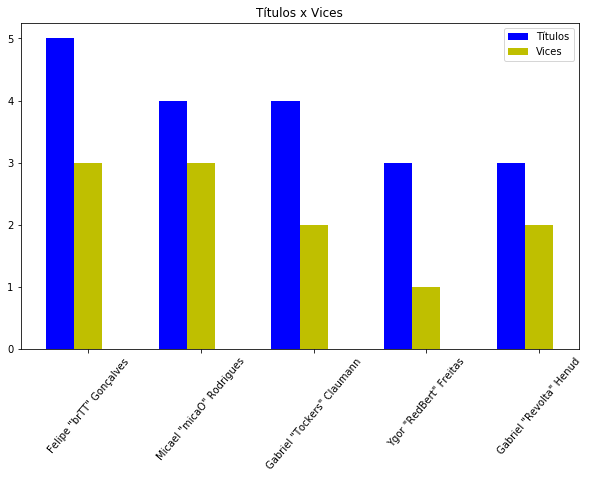

In [44]:
# Quantidade de vendas para o Produto A
participacao_jogadores_t = part_jog_sort1['Títulos'].head(5)

# Quantidade de vendas para o Produto B
participacao_jogadores_v = part_jog_sort1['Vices'].head(5)

plt.figure(figsize = (10, 6))

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(participacao_jogadores_t))
x2 = [x + 0.25 for x in x1]

plt.xticks(rotation = 50)


# Plota as barras
plt.bar(x1, participacao_jogadores_t, width=0.25, label = 'Títulos', color = 'b')
plt.bar(x2, participacao_jogadores_v, width=0.25, label = 'Vices', color = 'y')

# coloca o nome dos meses como label do eixo x
jogadores = part_jog_sort1['Jogador']
plt.xticks([x + 0.25 for x in range(len(participacao_jogadores_t))], jogadores)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Títulos x Vices")
plt.show()

#### Quais jogadores mais chegaram em Finais no CBLOL?

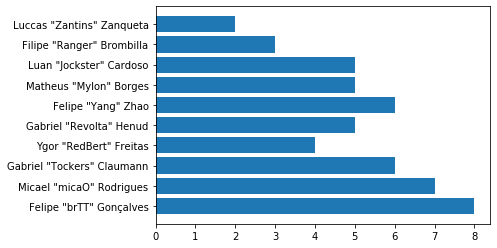

In [49]:
grupos = part_jog_sort1['Jogador']
valores = part_jog_sort1['Finais']
plt.barh(grupos, valores)
plt.show()

#### Qual jogador merece o título de "Vasco" do CBLOL?

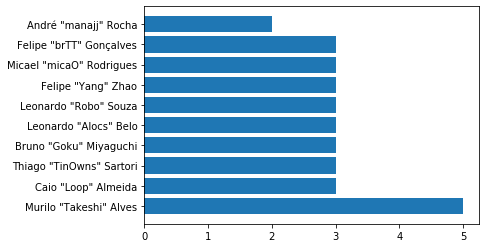

In [48]:
grupos = part_jog_sort2['Jogador']
valores = part_jog_sort2['Vices']
plt.barh(grupos, valores)
plt.show()

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [103]:
premios.head()

,Categoria,Ganhador,Equipe,2017
0,Jogador Revelação,Absolut,Team One,2017
1,Caçador,4Lan,Team One,2017
2,Melhor Suporte,Jockster,INTZ,2017
3,Melhor Técnico,Neki,Team One,2017
4,Melhor Topo,Vvvert,Team One,2017


#### Maior ganhador de Prêmios no CBLOL

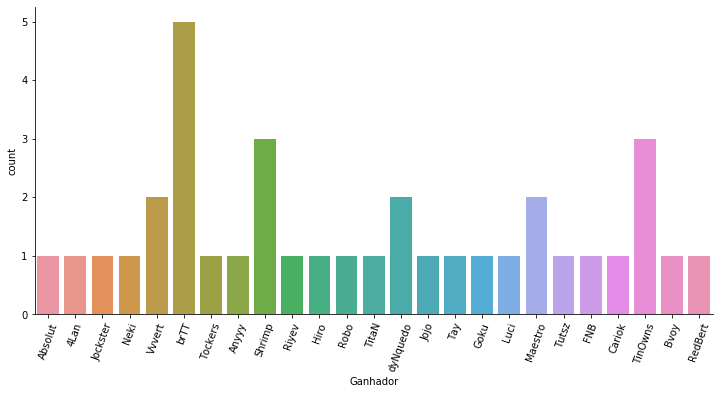

In [101]:


t = sns.factorplot('Ganhador', data=premios, kind='count', aspect=20/10)
t.set_xticklabels(rotation=70)



#### Organização que mais teve jogadores premiados no CBLOL

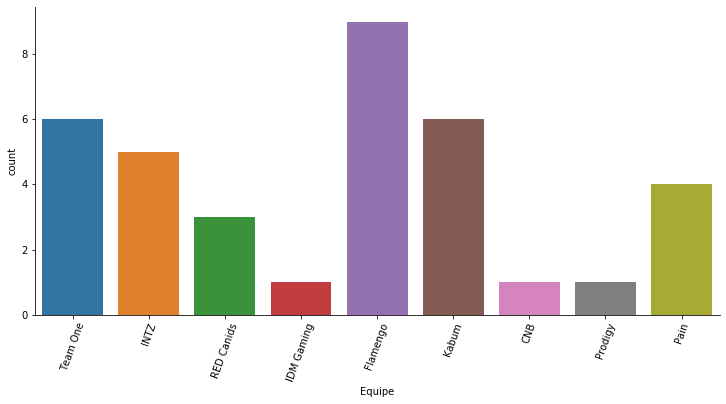

In [102]:
t1 = sns.factorplot('Equipe', data=premios, kind='count', aspect=20/10)
t1.set_xticklabels(rotation=70)